## HW2 - Model Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ImageBlock import ImageBlock
from BlockSimulation import *
from scipy import linalg as la
import sys

# Set print options to suppress scientific notation
np.set_printoptions(suppress=True)

## Part 1 - Simulate block of images with multiple flight strips

In [2]:
# define random seed
np.random.seed(0)

a = SimulateBlock(50, (36, 24), overlap=0.6 , num_images=2, num_strips=2, tie_pattern='4 corners', control_pattern='random block',num_control_points=5, rotations_sigma=10, altitude=1000)

block = a.simulate_block()

In [3]:
len(block.images)

4

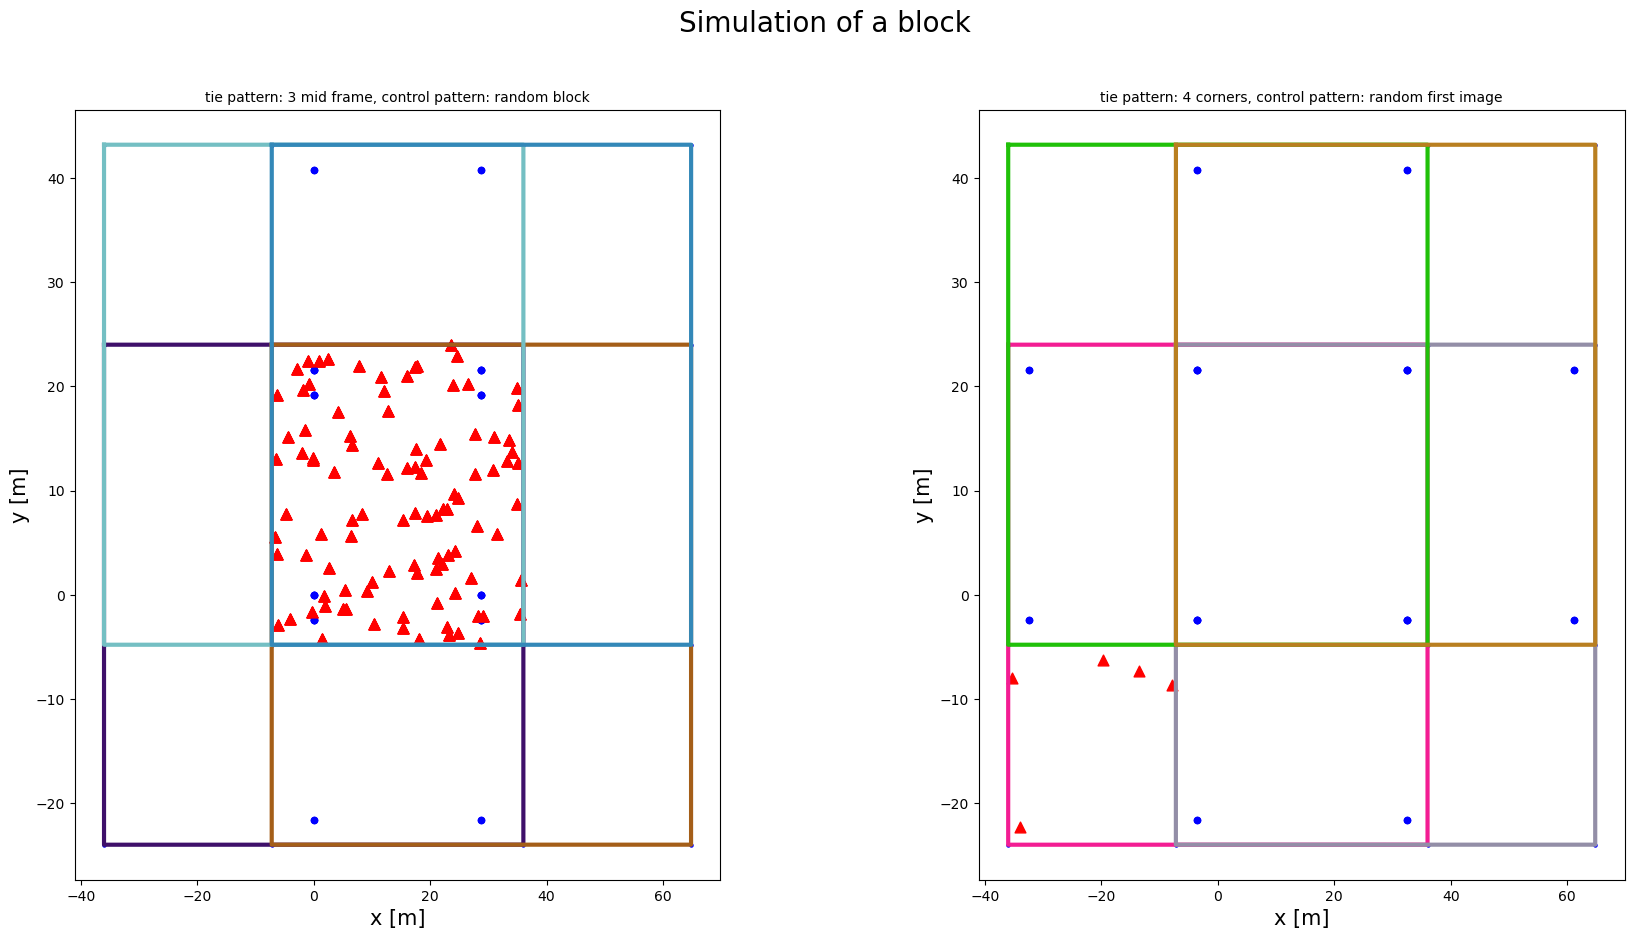

In [4]:
# define random seed
np.random.seed(0)

# plot different arguments options for the simulation using subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Simulation of a block', fontsize=20)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axes = axes.flatten()

a = SimulateBlock(50, (36, 24), overlap=0.6 , num_images=2, num_strips=2,  tie_pattern='3 mid frame', control_pattern='random block',num_control_points=100, rotations_sigma=10, altitude=100)
block = a.simulate_block()
block.draw_block(ax = axes[0])
# add title to the plot usimg the parameters of the simulation
axes[0].set_title('tie pattern: 3 mid frame, control pattern: random block', fontsize=10)
axes[0].set_xlabel('x [m]', fontsize=15)
axes[0].set_ylabel('y [m]', fontsize=15)
# axes[0].axis('equal')

np.random.seed(0)
a = SimulateBlock(50, (36, 24), overlap=0.6 , num_images=2, num_strips=2,  tie_pattern='4 corners', control_pattern='random first image', num_control_points=5, rotations_sigma=10, altitude=100)
block = a.simulate_block()
block.draw_block(ax = axes[1])
axes[1].set_title('tie pattern: 4 corners, control pattern: random first image', fontsize=10)
axes[1].set_xlabel('x [m]', fontsize=15)
axes[1].set_ylabel('y [m]', fontsize=15)
# axes[1].axis('equal')

plt.show()
# fig.savefig('Simulation of a block.png')


## Calculate condition number of the block

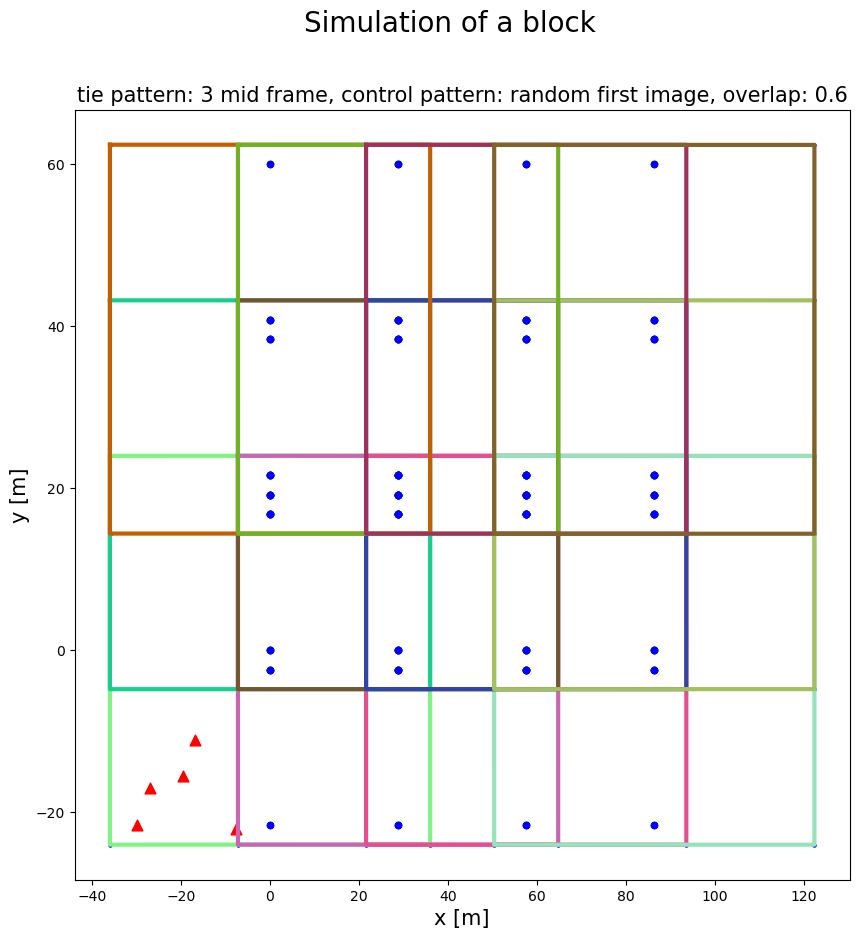

In [5]:
# define random seed
np.random.seed(0)
# plot different arguments options for the simulation using subplots
fig, axes = plt.subplots(1, 1, figsize=(10, 10))
fig.suptitle('Simulation of a block', fontsize=20)
# simulate a block
a = SimulateBlock(50, (36, 24), overlap=0.6 , num_images=4, num_strips=3,  tie_pattern='3 mid frame', control_pattern='random first image',num_control_points=5, rotations_sigma=10, altitude=100)
block = a.simulate_block()
# plot the block
block.draw_block(ax = axes)
axes.set_title(f'tie pattern: {a.tie_pattern}, control pattern: {a.control_pattern}, overlap: {a.overlap}', fontsize=15)
axes.set_xlabel('x [m]', fontsize=15)
axes.set_ylabel('y [m]', fontsize=15)
plt.show()
fig.savefig('Simulation of a block.png')

In [6]:
# compute the eigenvalues of N
eigvals = la.eigvals(block.N)
# print(eigvals)
# compute the condition number of N
cond = np.max(eigvals)/np.min(eigvals)
cond

(1.313636552976908e+18+0j)

C:\Users\lauterman\AppData\Local\Temp\ipykernel_19604\305536901.py:5: RuntimeWarning: invalid value encountered in sqrt
  diag_sqrt = np.sqrt(np.diag(Cov))


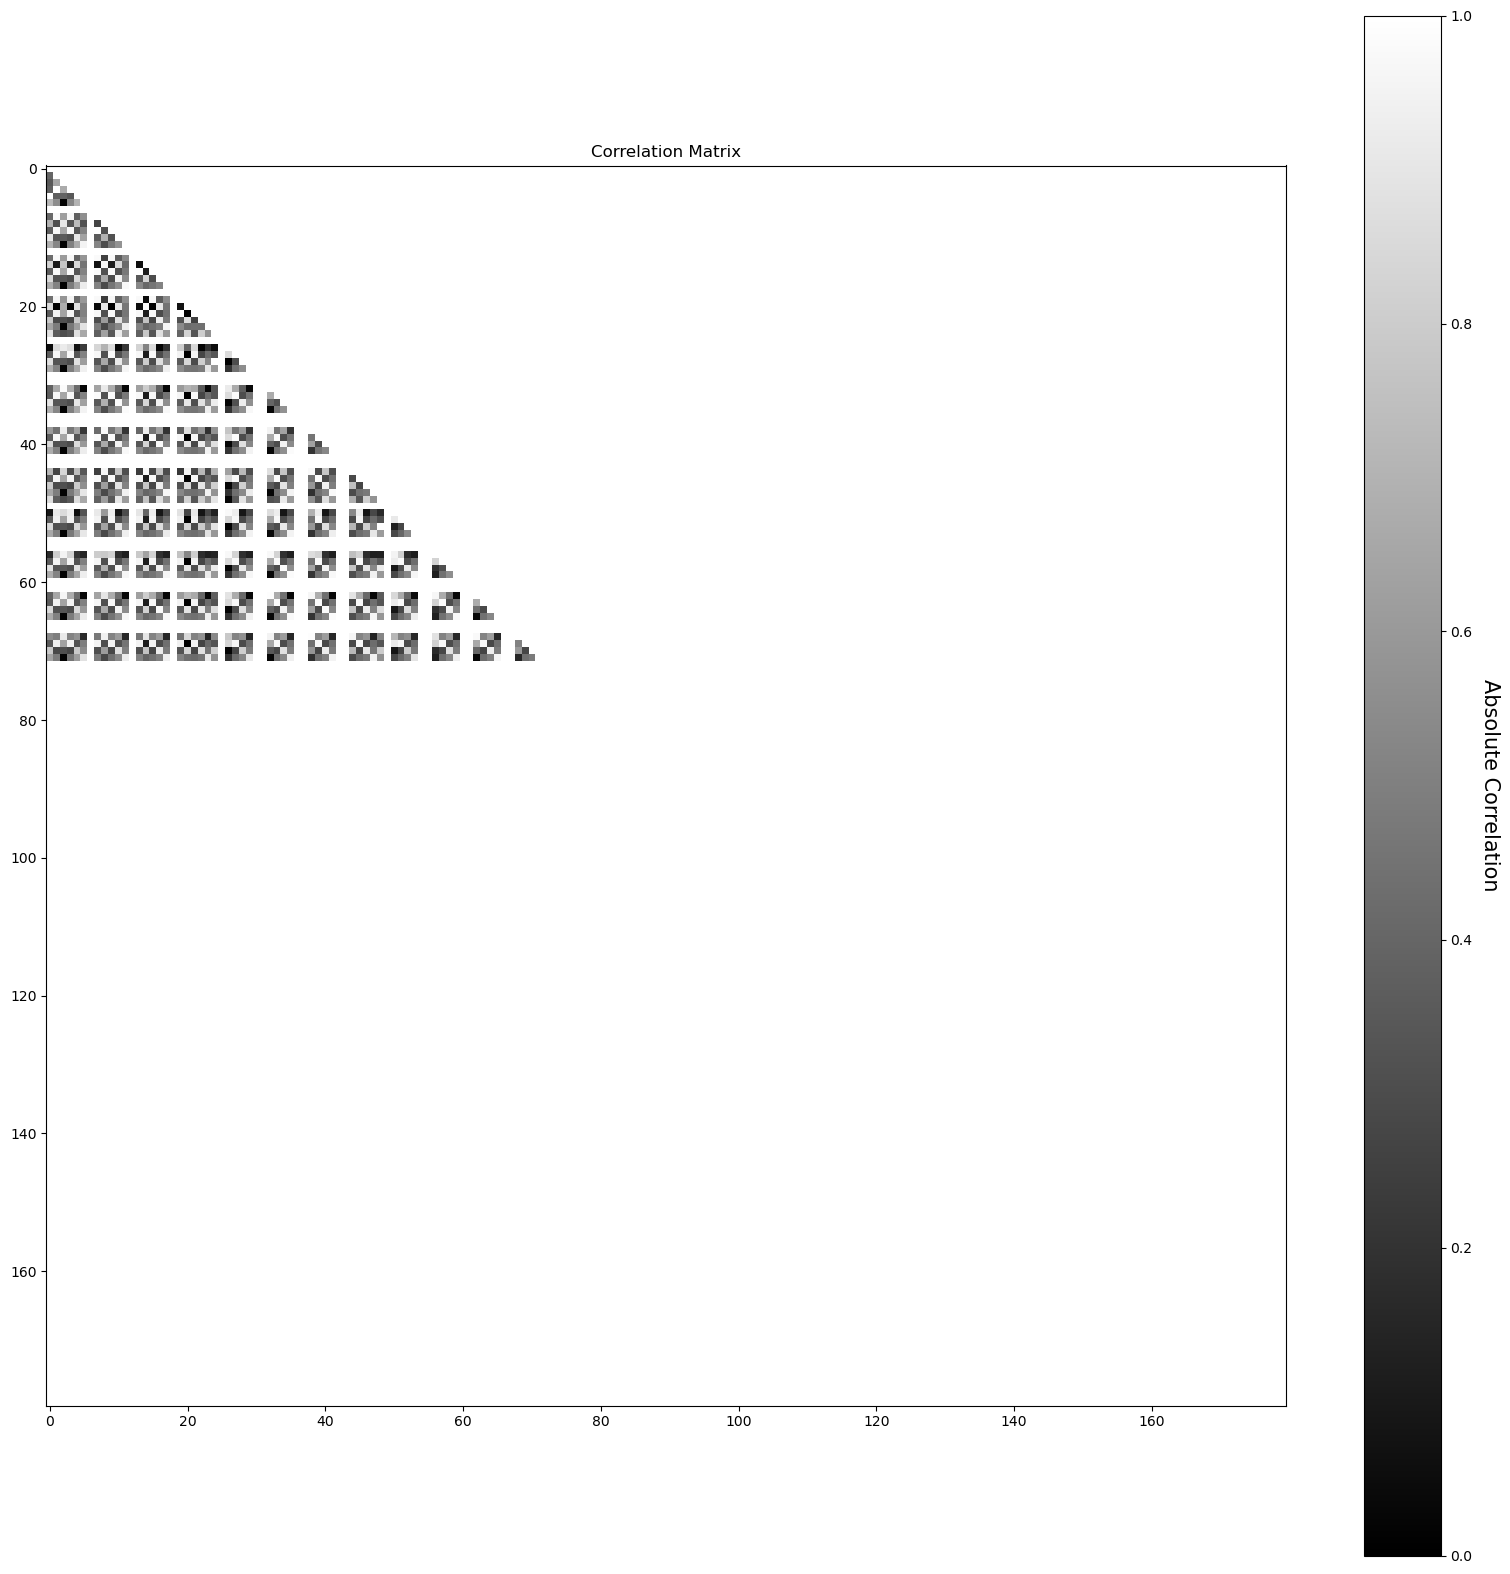

In [7]:
# compute the covariance matrix
Cov = np.linalg.inv(block.N)

# compute the correlation matrix
diag_sqrt = np.sqrt(np.diag(Cov))
correlation_matrix = Cov / np.outer(diag_sqrt, diag_sqrt)

# Mask the upper triangle of the correlation matrix
mask = np.tri(correlation_matrix.shape[0], k=-1).astype(bool).T
correlation_matrix = np.ma.array(correlation_matrix, mask=mask)

# Plot the correlation matrix
fig, ax = plt.subplots(figsize=(20, 20))
plt.imshow(np.abs(correlation_matrix), cmap='gray', vmin=0, vmax=1)
# colorbar title
cbar = plt.colorbar()
cbar.set_label('Absolute Correlation', rotation=270, labelpad=20, fontsize=15)
plt.title('Correlation Matrix')
plt.show()

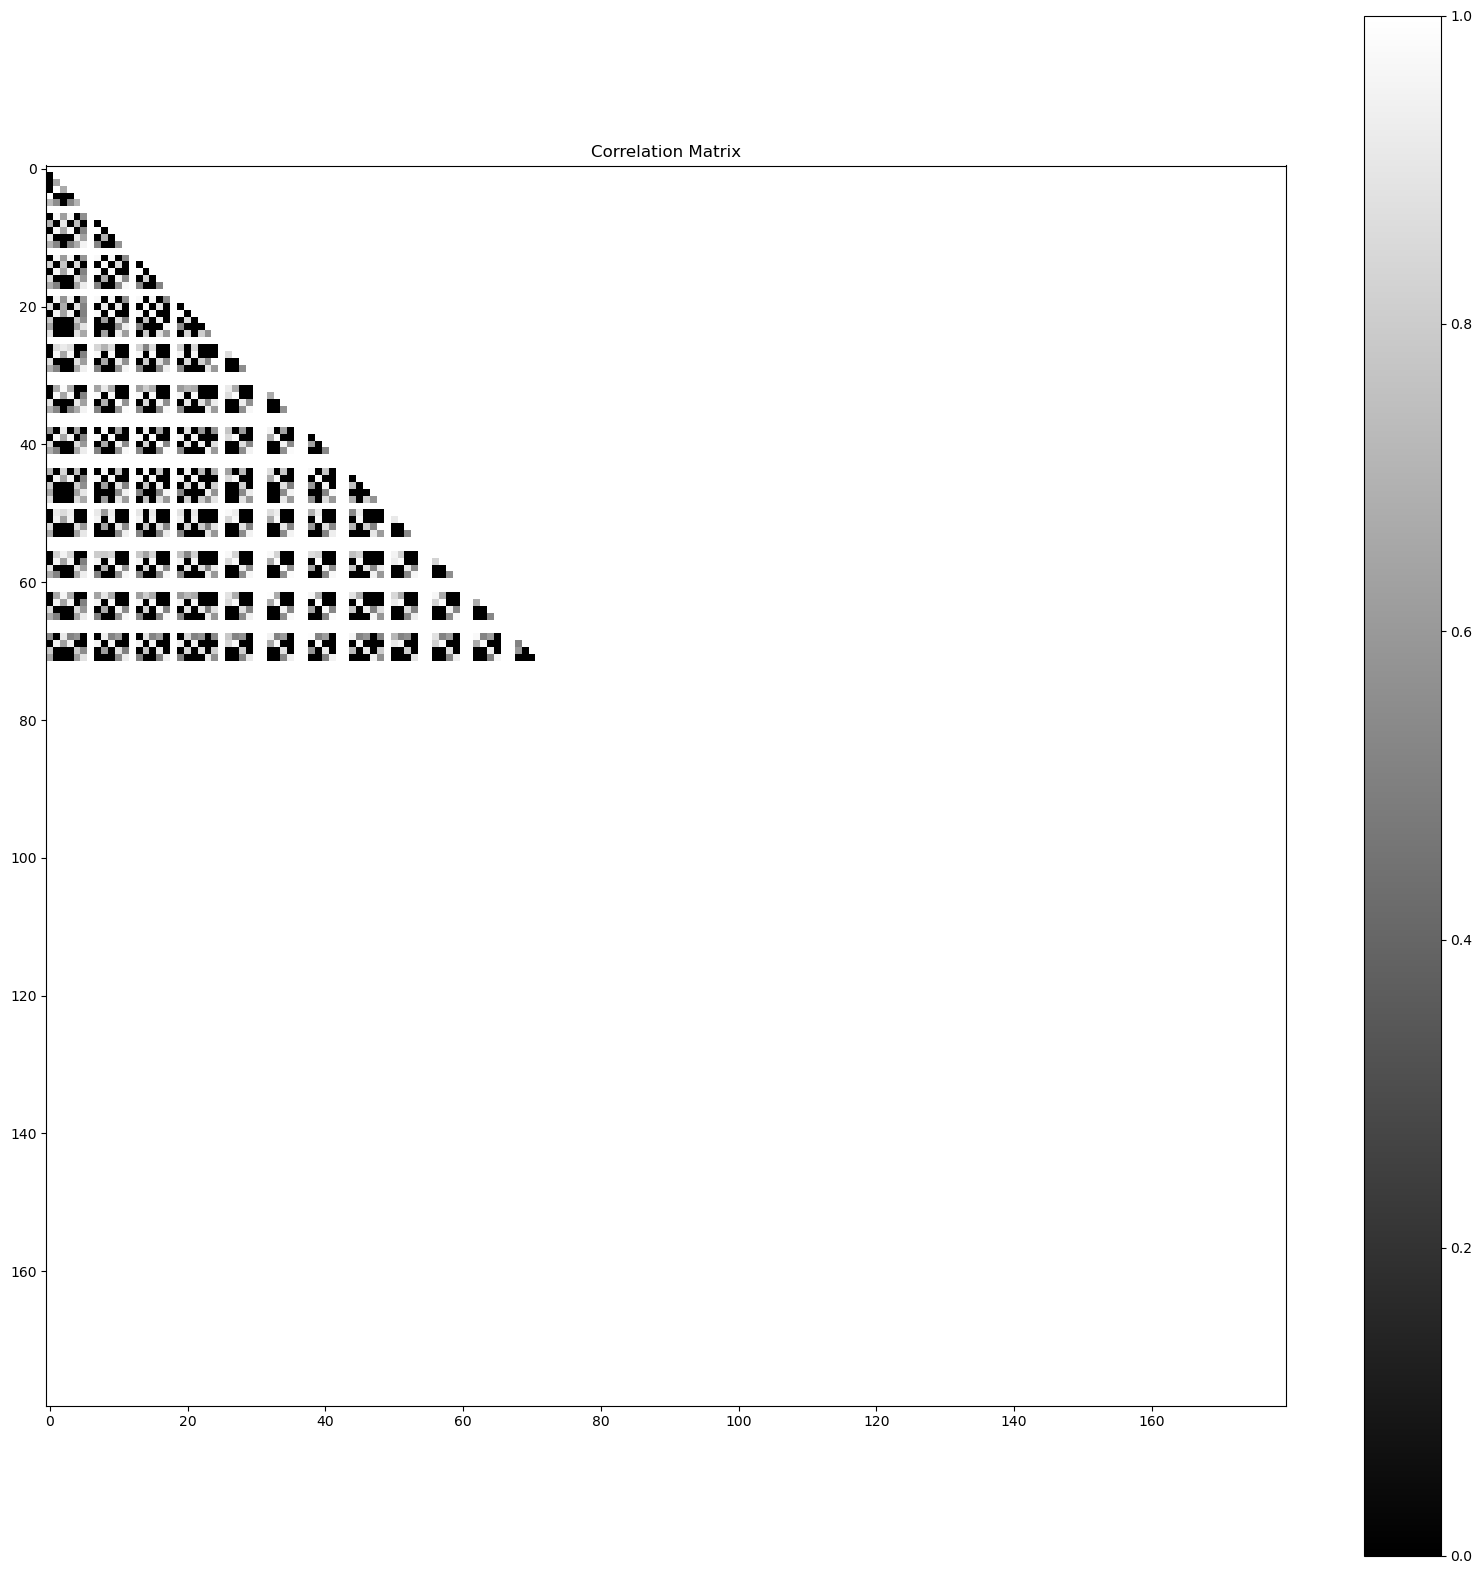

In [8]:
# Mask the values with absolute value lower than 0.5
correlation_matrix[np.abs(correlation_matrix) <= 0.5]=0
# Plot the correlation matrix
fig, ax = plt.subplots(figsize=(20, 20))
plt.imshow(np.abs(correlation_matrix), cmap='gray', vmin=0, vmax=1)
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

## Find optinal configuration for the block

In [9]:
# create dataframe for configuration for simulating blocks
config = pd.DataFrame(columns=['focal_length', 'image_size', 'overlap', 'num_images', 'num_strips', 'tie_pattern', 'control_pattern', 'num_control_points', 'rotations_sigma', 'altitude'])
focal_length = 50
image_size = (36, 24)
overlap = [0.6, 0.7, 0.8, 0.9]
num_images = 4
num_strips = 3
tie_pattern = ['3 mid frame', '4 corners']
control_pattern = ['random block', 'random first image', '5 points']
num_control_points = 5
rotations_sigma = 5
altitude = 100

# populate the dataframe
for overlap_value in overlap:
    for tie_pattern_value in tie_pattern:
        for control_pattern_value in control_pattern:
            config.loc[len(config)] = [focal_length, image_size, overlap_value, num_images, num_strips, tie_pattern_value, control_pattern_value, num_control_points, rotations_sigma, altitude]

config

,focal_length,image_size,overlap,num_images,num_strips,tie_pattern,control_pattern,num_control_points,rotations_sigma,altitude
0,50,"(36, 24)",0.6,4,3,3 mid frame,random block,5,5,100
1,50,"(36, 24)",0.6,4,3,3 mid frame,random first image,5,5,100
2,50,"(36, 24)",0.6,4,3,3 mid frame,5 points,5,5,100
3,50,"(36, 24)",0.6,4,3,4 corners,random block,5,5,100
4,50,"(36, 24)",0.6,4,3,4 corners,random first image,5,5,100
5,50,"(36, 24)",0.6,4,3,4 corners,5 points,5,5,100
6,50,"(36, 24)",0.7,4,3,3 mid frame,random block,5,5,100
7,50,"(36, 24)",0.7,4,3,3 mid frame,random first image,5,5,100
8,50,"(36, 24)",0.7,4,3,3 mid frame,5 points,5,5,100
9,50,"(36, 24)",0.7,4,3,4 corners,random block,5,5,100


In [10]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


blocks = []
failed_runs = []
corr_matrices = []

# Open the file in write mode
with open('output.txt', 'w') as file:
    # Temporarily replace sys.stdout with the file object
    old_stdout = sys.stdout
    sys.stdout = file

    for index, row in config.iterrows():
        focal_length = row['focal_length']
        image_size = row['image_size']
        overlap = row['overlap']
        num_images = row['num_images']
        num_strips = row['num_strips']
        tie_pattern = row['tie_pattern']
        control_pattern = row['control_pattern']
        num_control_points = row['num_control_points']
        rotations_sigma = row['rotations_sigma']
        altitude = row['altitude']

        print('configuration {}: control pattern: {}, tie pattern: {}, overlap: {}'.format(index, control_pattern, tie_pattern, overlap))

        block = None
        

        try:
            simulation = SimulateBlock(focal_length, image_size, overlap, num_images, num_strips, tie_pattern, control_pattern, num_control_points, rotations_sigma, altitude)
            block = simulation.simulate_block()
            SimulateBlock.add_noise_to_block(block, sigma_location=0.5, sigma_rotation=100, sigma_image_points=1, sigma_tie_points=0.5)
            corr_matrices.append(block.correlation_matrix())            
            X,RMSE, sigmaX, condition_numbers=block.BundleAdjustment(0.01, 100, method='naive')
        except Exception as e:
            print('Exception occurred for configuration {}'.format(index))
            failed_runs.append(index)

        # blocks.append(block)
        
    # Reset sys.stdout to the original value
    sys.stdout = old_stdout

config['failed_runs'] = [False]*len(config)
config.loc[failed_runs, 'failed_runs'] = True

# Restore warning behavior (optional)
warnings.filterwarnings("default")


### Parse the output file to get the condition numbers for each configuration

In [11]:
import re

filename = "output.txt"  # Replace with the actual file name

configurations = []
A_conditions = []
N_conditions = []

# Read the text from the file
with open(filename, "r") as file:
    text = file.read()

# Use regular expressions to extract the desired information
pattern = r"configuration (\d+):.*?iteration:.*?condition number A:\s+([\d.e+]+).*?condition number N:\s+([\d.e+]+)"
matches = re.findall(pattern, text, re.DOTALL)

for match in matches:
    configuration = int(match[0])
    A_condition = float(match[1])
    N_condition = float(match[2])

    configurations.append(configuration)
    A_conditions.append(A_condition)
    N_conditions.append(N_condition)

print("Configurations:", configurations)
print("A Conditions:", A_conditions)
print("N Conditions:", N_conditions)

Configurations: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
A Conditions: [72163.367581631, 1.0509828656526258e+16, 21556.00671943988, 35188.68942802636, 1.0030861899869244e+16, 12679.335833749406, 17300.312541762705, 1.0874448848374662e+16, 24079.36019450751, 22573.882002545077, 1.0038135739183872e+16, 10908.766379872155, 18078.361903521214, 1.031261388919791e+16, 22936.53740397321, 14778.897488530183, 1.004857435067715e+16, 12641.930273287795, 33163.35503452859, 1.0086386497470288e+16, 14338.454837159934, 22431.678966508378, 1.0061586853312618e+16, 20182.677188633697]
N Conditions: [5207551907.147144, 1.0483570408112764e+16, 464661443.43086964, 1238243862.641358, 1.0020819989770514e+16, 160765557.3933714, 299300815.8119703, 1.0656733277111224e+16, 579815589.3345673, 509580134.7354893, 1.003375689595926e+16, 119001183.71874322, 326827171.5069454, 1.027758729668125e+16, 526084744.771753, 218415808.4964799, 1.0052499647221804e+16, 159818401.179

In [12]:
# add the condition numbers to the dataframe
config['A_condition'] = A_conditions
config['N_condition'] = N_conditions

In [13]:
# config[['overlap', 'tie_pattern', 'control_pattern', 'A_condition', 'N_condition','failed_runs']].to_csv('results.csv')

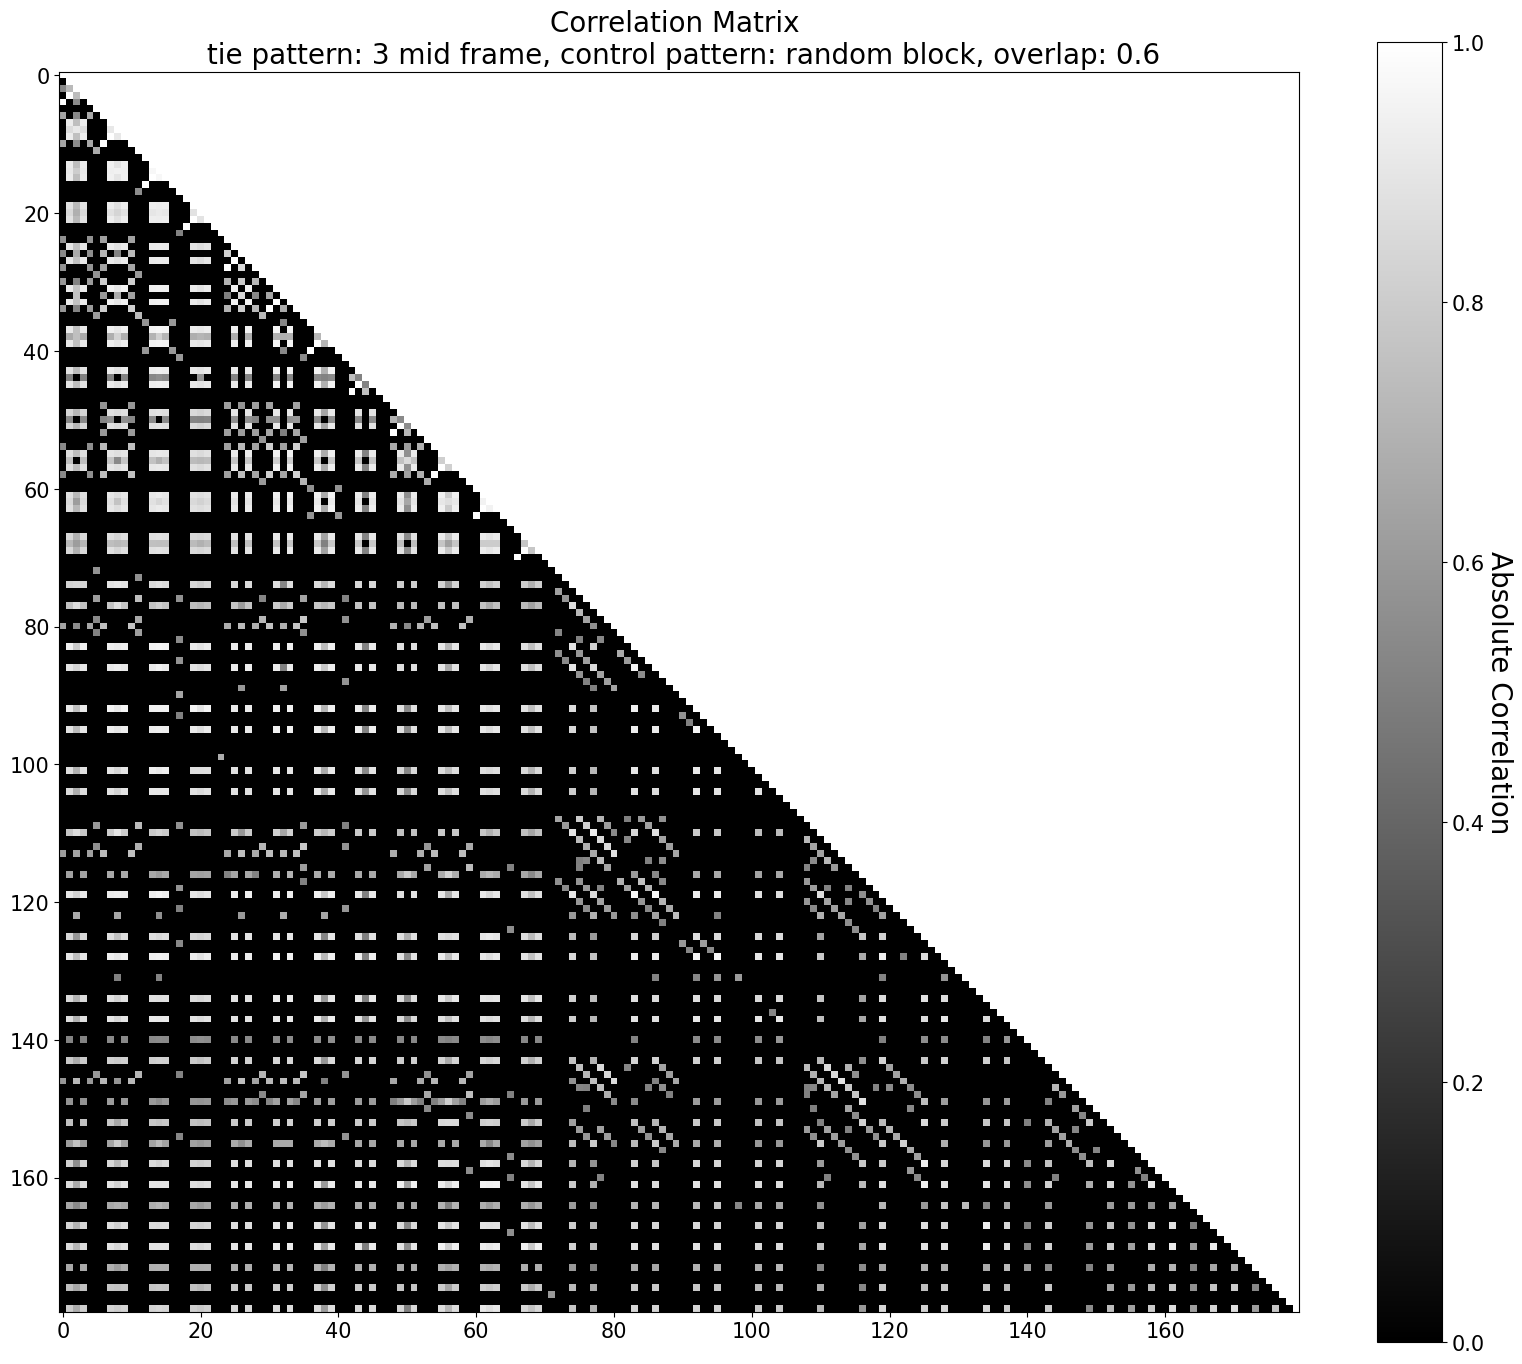

In [14]:
# Plot the correlation matrix
index = 0
# Mask the values with absolute value lower than 0.5
correlation_matrix = np.abs(corr_matrices[index])
correlation_matrix[correlation_matrix <= 0.5]=0
fig, ax = plt.subplots(figsize=(20, 20))
heatmap  = plt.imshow(np.abs(correlation_matrix), cmap='gray', vmin=0, vmax=1)

# colorbar
cbar = plt.colorbar(heatmap)
cbar.set_label('Absolute Correlation', rotation=270, labelpad=20, fontsize=20)
cbar.ax.tick_params(labelsize=15)
# title
plt.title(f'Correlation Matrix \n tie pattern: {config.tie_pattern[index]}, control pattern: {config.control_pattern[index]}, overlap: {config.overlap[index]}', fontsize=20)

# adjust ticks and labels font size
ax.tick_params(axis='both', which='major', labelsize=15)


# Adjust the subplot's position and size
fig.subplots_adjust(top=0.8, bottom=0.15)

plt.show()
fig.savefig('Correlation matrix masked.png')

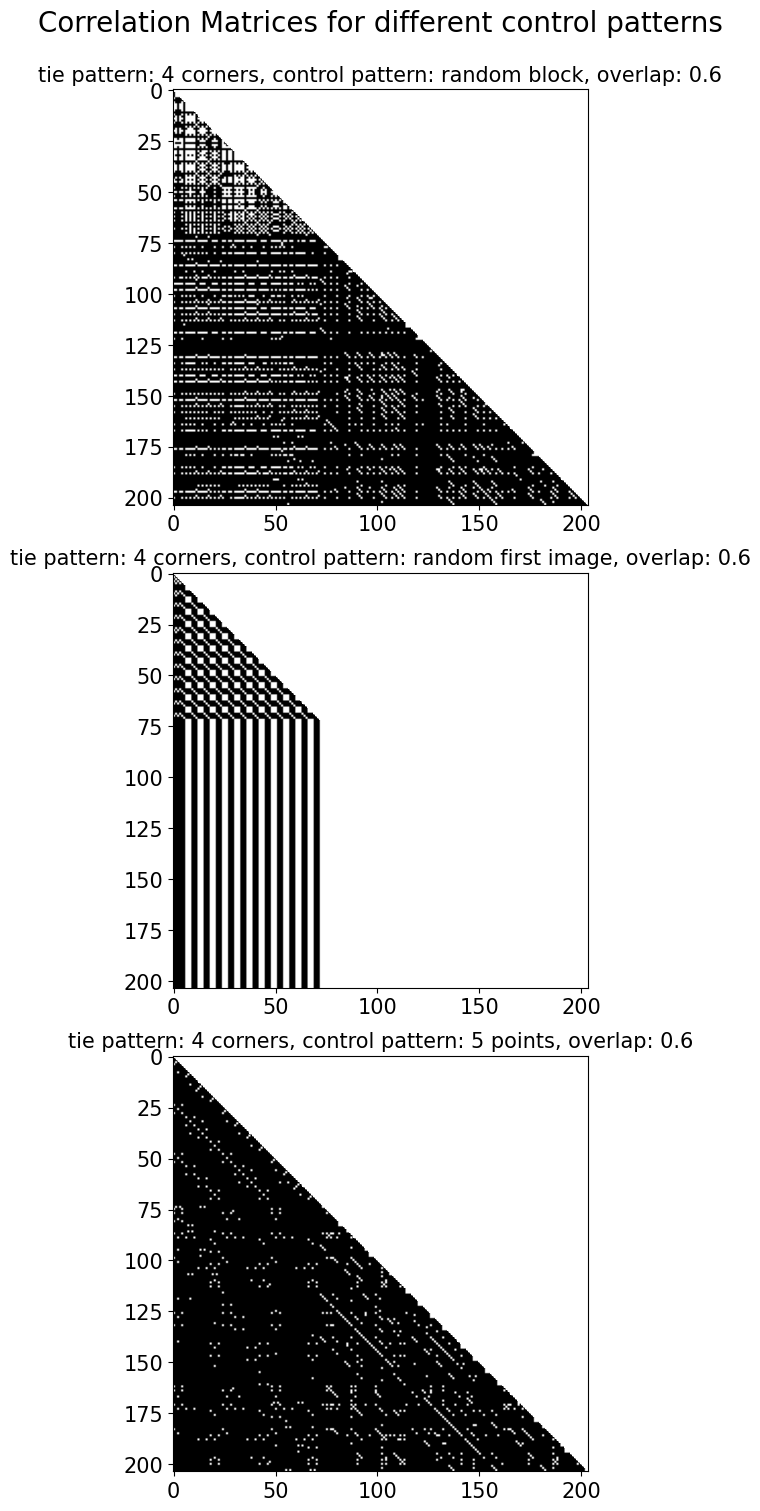

In [20]:

temp_df = config[(config['overlap']==0.6) & (config['tie_pattern']=='4 corners')]
fig = plt.figure(figsize=(20, 20))
axes = []
# axes = axes.flatten()
i=0
for index,row in temp_df.iterrows():
    correlation_matrix = np.abs(corr_matrices[index])
    correlation_matrix[correlation_matrix <= 0.5]=0
    correlation_matrix[correlation_matrix > 0.5]=1
    axes.append(fig.add_subplot(4, 1, i+1))
    axes[i].imshow(np.abs(correlation_matrix), cmap='gray', vmin=0, vmax=1)
    axes[i].set_title(f'tie pattern: {config.tie_pattern[index]}, control pattern: {config.control_pattern[index]}, overlap: {config.overlap[index]}', fontsize=15)
    axes[i].tick_params(axis='both', which='major', labelsize=15)
    i+=1

fig.suptitle('Correlation Matrices for different control patterns', fontsize=20)
# Adjust the top margin to reduce the space between the main title and subplots

plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()
fig.savefig('Correlation matrices for different control patterns.png')
    